# 01 - Dados com muitas dimensões

In [ ]:
# Importando a base de estudo

import pandas as pd

resultados_exames = pd.read_csv("exames.csv")
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [ ]:
# Separando o BD em base de teste e treino

from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico)

In [ ]:
# Verificando a quantidade de registros vazios no BD

resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
# Na coluna exame_33 detectamos que 73,6% dos registros estão vazios.
# Tendo em sua maior parte resultados vazios, optamos por remover a variável do modelo.

419/569

0.7363796133567663

In [ ]:
# Recriando o modelo com a primeira trativa, removendo a coluna exame_33 da variável valores_exames
# e reprocessando o modelo.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=["id", "diagnostico"])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

Resultado da classificação 92.40%


In [ ]:
# Criando um modelo base de verificação simples para comparar com o resultado de classificação anteriormente obtido

from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" % (classificador_bobo.score(teste_x, teste_y)* 100))

Resultado da classificação boba 66.67%


Sendo o resultado da classificação de 92,40% muito superior ao obtido através da classificação simples que foi de 66,67%, entendemos que o modelo de classificação está satisfatório.

# 02 - Avançando e explorando dados

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

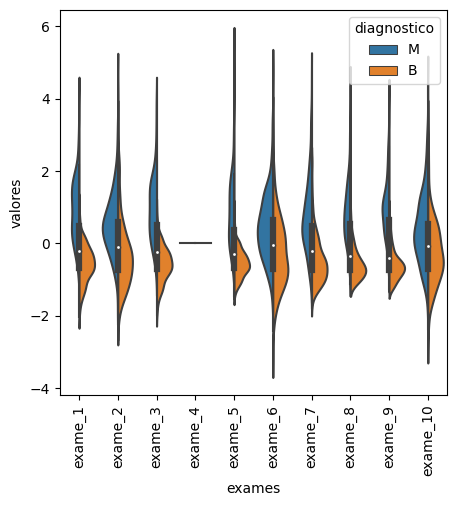

In [ ]:
# Para analisar o impacto de cada variável na determinação da variável dependente, plotamos o gráfico
# de violino.
# Nele identificamos variáveis que possui 0 influência como o exame_4 que possui valores constantes.

# Na função adicionamos o método pd.melt para criar uma tabela matriz com as colunas diagnostico, exames e valores,
# a função replica os valores de diagnóstico e exames para agrupar na coluna valores os resultados.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns = valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

plt.figure(figsize=(5,5))

sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot,
              split = True)

plt.xticks(rotation = 90)

In [ ]:
# Analisando os valores constantes do exame_4.

valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

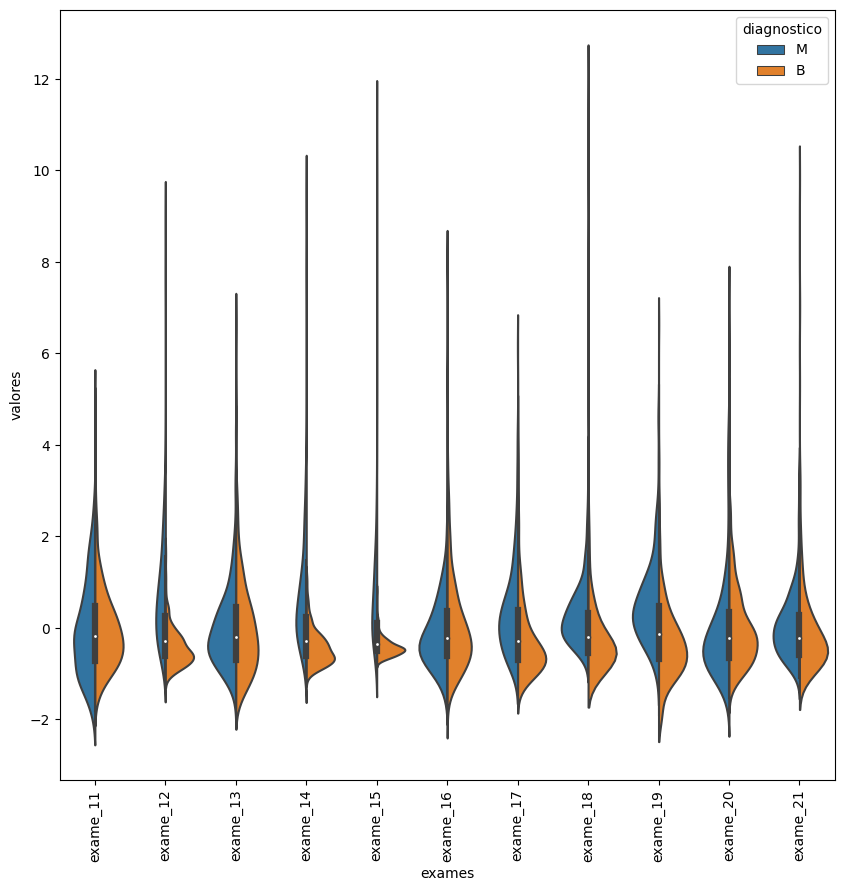

In [ ]:
# Criando uma função para plotar o gráfico dos demais exames.

def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                         var_name="exames",
                         value_name="valores")
    plt.figure(figsize=(10,10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", 
                    data = dados_plot, split = True)
    plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2, 10, 21)

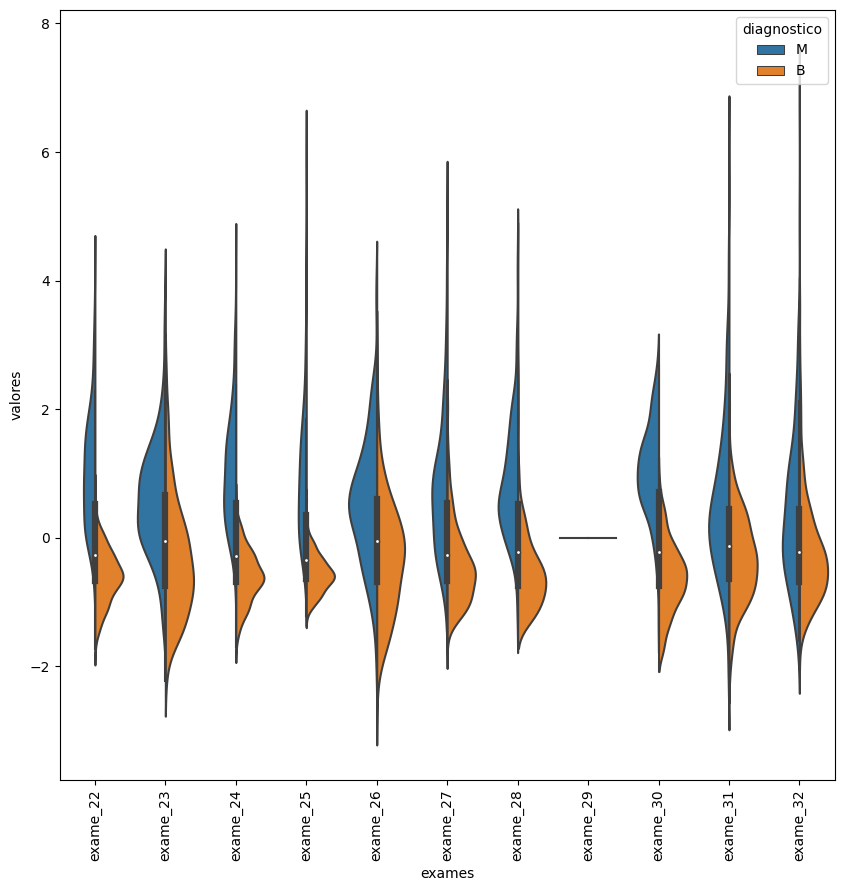

In [ ]:
# No exame_29 observamos o mesmo comportamento de variável constante.

grafico_violino(valores_exames_v2, 21, 32)

In [ ]:
# Atualizando a função classificar removendo do conjunto de dados as variáveis constantes que
# não inteferem na definição da variável dependete.

valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29","exame_4"])

def classificar(valores):
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                            diagnostico, 
                                                            test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

classificar(valores_exames_v3)

Resultado da classificação 93.57%


Com o resultado 93,57% superior ao anterior de 92,40%, confirmamos que a remoção das variáveis constantes do modelo favorecel ao modelo.

#03 - Dados correlacionados

In [ ]:
# Gerando a matriz de correlação entre as variáveis.

valores_exames_v3.corr() 

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

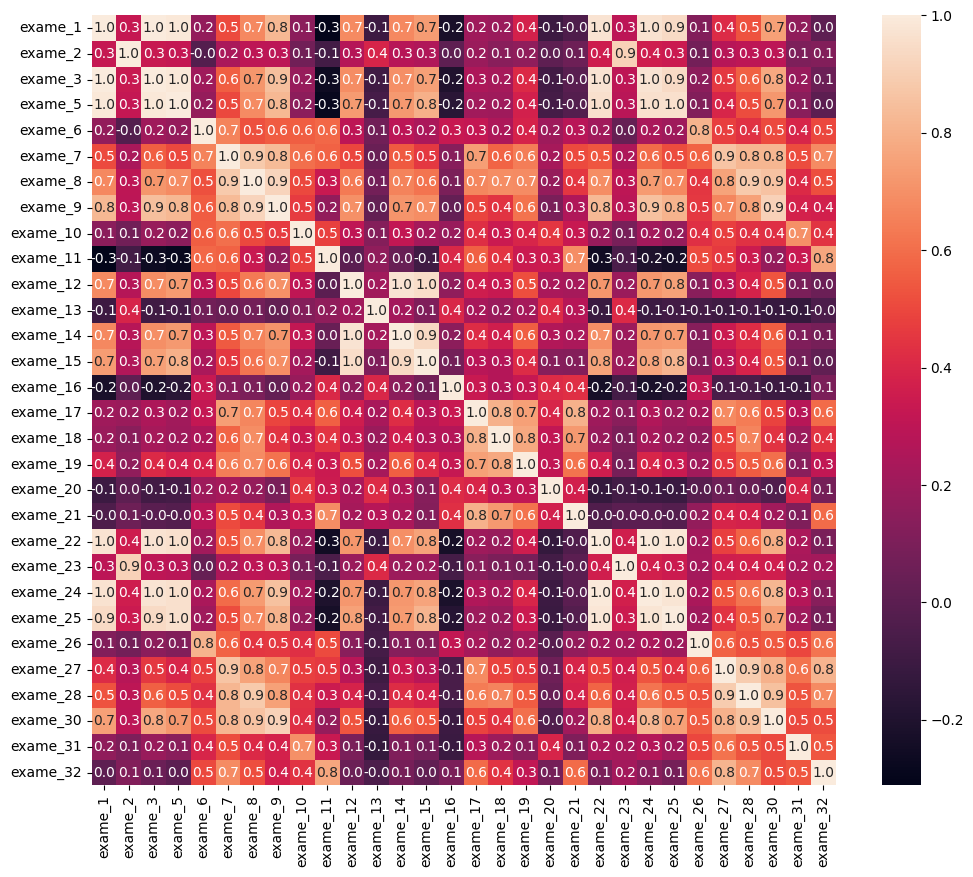

In [ ]:
# Devido a dificuldade de se analisar a carrelação em uma matriz, criamos um gráfico de calor para tornar mais simples o processo
# de análise entre as correlações.

matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize = (12, 10))

sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

In [ ]:
# Gerando uma nova matriz de correlação, filtrando apenas valores > 0.99.

matriz_correlacao_v1 =  matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Utilizando a função sum para agregar e remover valores NaN.

matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
# Filtrando variáveis com alto valor de correlação para remoção no modelo.

variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
# Removendo as 4 variáveis de alto valor de correlação.

valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# Verificando o resultado da nova classificação.

classificar(valores_exames_v4)

Resultado da classificação 94.15%


In [ ]:
# Testando o valor da classificação removendo apenas uma das variáveis que possuem alta correlação mútua.

valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 94.15%


Com os ajustes observamos que a remoção de ao menos uma das variáveis de alta correlação ajudou a melhor os resultados da classificação de 93,57% para 94,15%.

# 04 - Automatizando a seleção

In [ ]:
# Com o método SelectKBest do sklearn conseguimos filtrar de forma simplificada,
# as k melhores variáveis a serem mantidas no nosso modelo.

# Na aplicação da função fizemos o teste da classficação selecionando apenas as
# 5 melhores variáveis.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x7f6fadc908b0>)

In [ ]:
# Gerando os novos valores de treino considerando um filtro das variáveis com apenas as
# 5 melhores variáveis.

# No processo criamos a valores_exames_v6 que repete as trativas feitas de remoção até aqui.

SEED = 1234
random.seed(SEED)


valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [ ]:
# Com o kbest temos o novo valore de classificação considerando apenas as 5 variávies principais.

# O resultado foi satisfatório partindo do principio que reduziríamos o volume de exames de 33 para
# 5 para ter um sucesso de 92,40% na definição do resultado.

classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 92.40%


In [ ]:
# Para verificar se o modelo está sendo acertivo tanto para resultados benignos quanto para malignos,
# criamos uma matriz de confução utilizando o método confusion_matrix do sklearn.

# Para gerar os resultados preditos utilizamos o método .predict considerando o modelo das variáveis
# filtradas utilizando o método kbest.

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, -3.7500000000000053, 'Predição'),
 Text(14.750000000000002, 0.5, 'Real')]

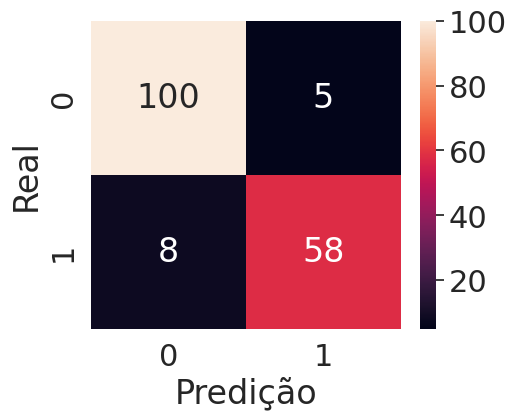

In [ ]:
# Para otimizar a visualização plotamos o gráfico da matriz de confusão, onde observamos
# uma acurária de 95,2% (100/105) para resultados benignos e de 87,9% (58/66) para resultados
# malignos.

plt.figure(figsize = (5, 4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

Resultado da classificação 90.06%


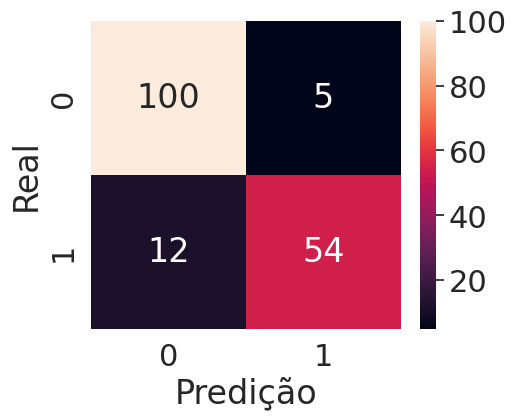

In [ ]:
# Utilizando o método RFE do sklearn para de forma automática selecionar as k melhores variáveis.

# De forma similar ao SelectKBest o método seleciona os valores dentro do DF.

# No modelo foi utilizaodo o df valores_exames_v6 (que possui a prévia remoção de algumas variáveis)
# no train_test_split.

from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (5, 4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))


Como resultado observamos que o método SelectKBest se saiu melhor em relação ao RFE, tando na acurária geral SelectKBest=92,4% e RFE=90,06% quanto nas análises individuais, pois na determinação do tipo maligno o RFE teve uma performance de 81,8% enquanto o resultado do SelectKBest foi de 87,9%.

# 05 - Visualizando os dados no plano

Resultado da classificação 92.98%


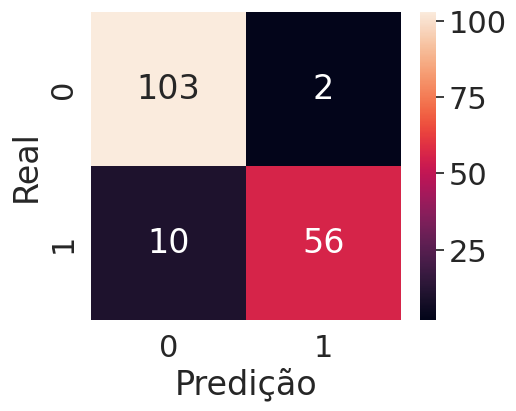

In [ ]:
# Utilizando o método RFECV conseguimos um novo modelo estimado através da acurácia,
# onde de forma automática é selecionada a quantidade de features e quais features,
# são mais apropriadas para o melhor resultado na estimação de Y.

from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (5, 4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

Resultado da classificação 87.13%


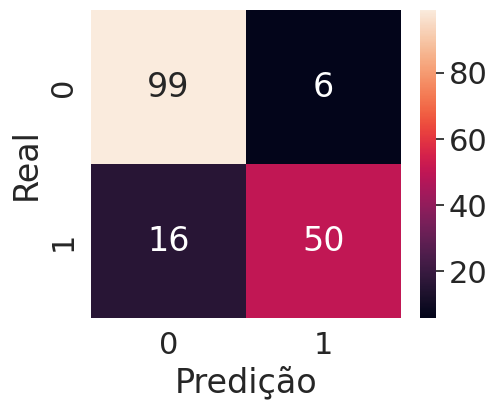

In [ ]:
# Para tentarmos plotar um scatter plot dos resultados, inicialmente recriamos o modelo,
# selecionando apenas duas features.

from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (5, 4))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

<Axes: >

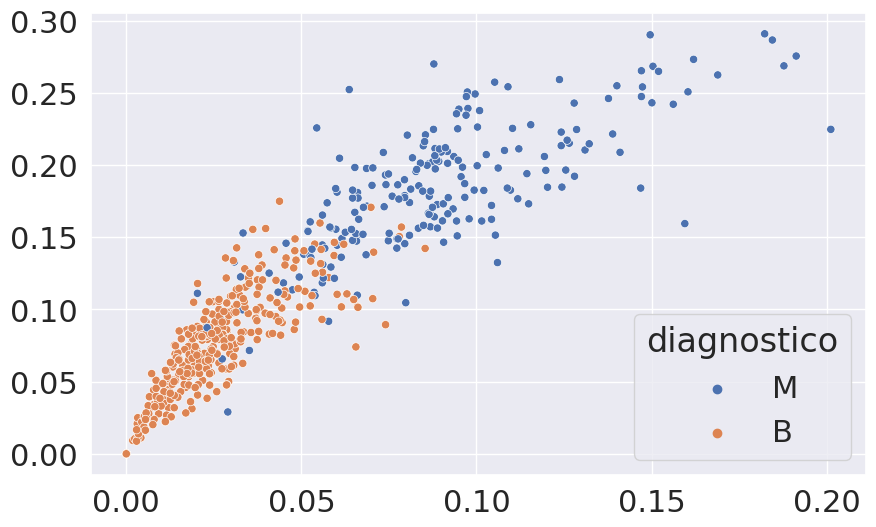

In [ ]:
# Com duas features selecionadas pudemos plotar o gráfico, porém utilizando essa abordagem,
# ignoramos todas as demais features que são relevantes para determinação da variável dependete.

import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

<Axes: >

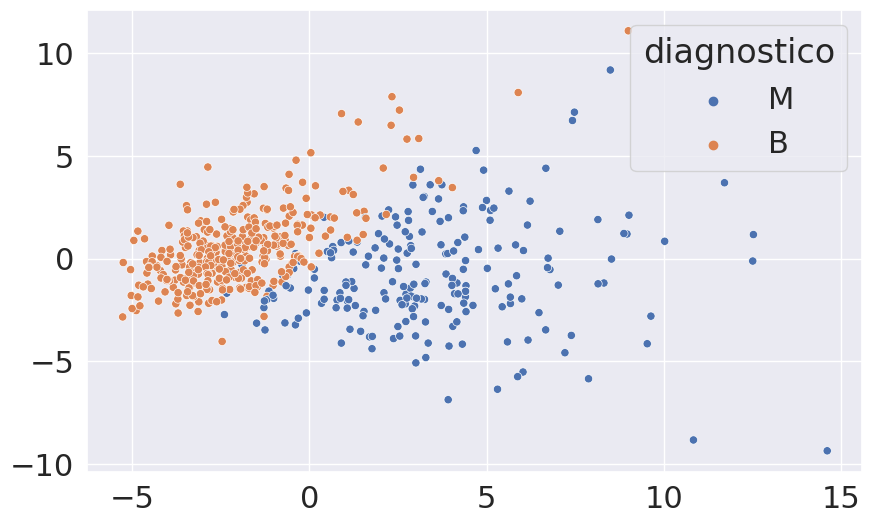

In [ ]:
# Utilizando o decomposition do sklearn decompomos as features para um modelo de 2 dimensões,
# permitindo visualizar o scatter dos resultados sem perder a visão do conjunto como um todo.

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(10, 6))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

<Axes: >

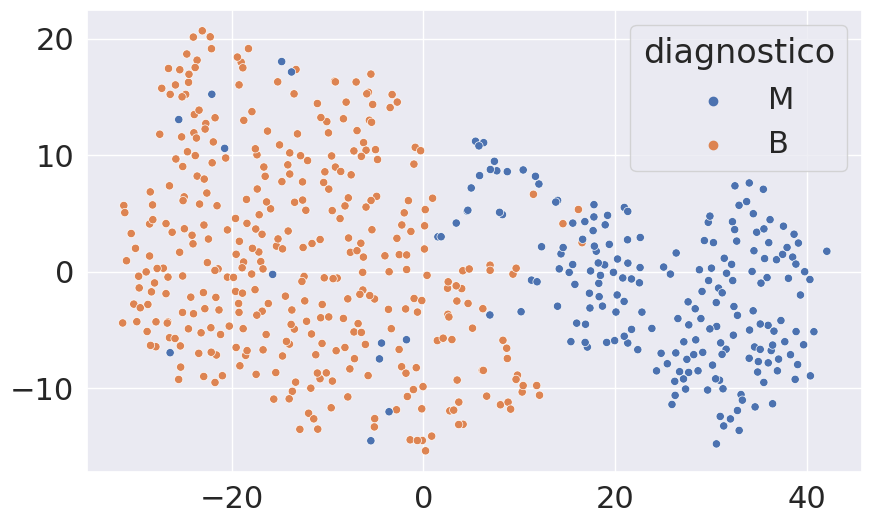

In [ ]:
# Outro método para visualização do scatterplot de muitas dimensões é utilizando o manifold.

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(10, 6))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)